### A First, Naive Learned Index on Log normal dataset
This is an implementation of learning indexes using neural networks as described in the recent [paper](https://arxiv.org/pdf/1712.01208.pdf) from google.

##### some variable initialisations

In [63]:
mu, sigma = 3., 1. # mean and standard deviation
num_datapoints = 10000

##### Importing libraries and preparing training data to be indexed

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
s = np.random.lognormal(mu, sigma, num_datapoints)
np_data = np.asarray(sorted(s))

##### Using pytorch to train a neural network to learn the indexes of the dataset (s)

In [136]:
import torch
N, D_in, H, D_out = 64, 1, 100, 1
x = torch.FloatTensor(np_data.reshape(num_datapoints,1)[:,:])
y = torch.FloatTensor(np.arange(np_data.shape[0]).reshape(num_datapoints,1))
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.L1Loss()
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
plot_step,plot_lossess = [],[]
for t in range(5000):
    y_pred = model(x)

    
    loss = loss_fn(y_pred, y)
    if t%1000 == 0:
        print(t, loss.item())
        plot_step.append(t)
        plot_lossess.append(loss.item())

    
    optimizer.zero_grad()

    
    loss.backward()

    
    optimizer.step()

0 5003.6962890625
1000 1281.3604736328125
2000 632.1152954101562
3000 239.5489501953125
4000 100.27951049804688


##### Time taken by model to predict index positions for all points in the dataset (s)

In [144]:
%%time
error_predicted_index = []
predicted_index = []
for p in range(0,num_datapoints-1):
    p_i = model(x[p])
    predicted_index.append(p_i)
    error_predicted_index.append(p_i - p)
    
print("Total datapoint: "+str(num_datapoints))

Total datapoint: 10000
CPU times: user 752 ms, sys: 40.6 ms, total: 793 ms
Wall time: 796 ms


##### Various plots to visually understand the dataset, model trainig and index predictions.
Plot 2 shows that the error in predicted_index is very low usually around zero for most of the dataset. This is an encouraging result for a naive approach in using neural network for learning indexes.

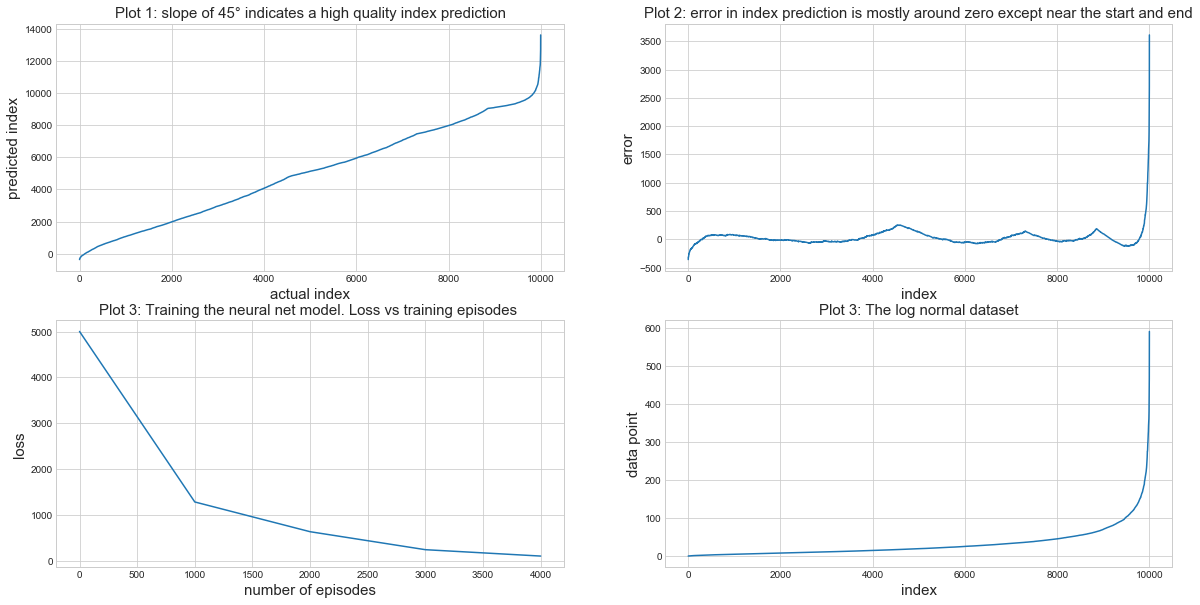

In [146]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax = ax1
ax.set_xlabel("actual index",fontsize=15)
ax.set_ylabel("predicted index",fontsize=15)
ax.set_title("Plot 1: slope of 45° indicates a high quality index prediction", fontsize=15)
ax.plot(range(0,num_datapoints-1), predicted_index);

ax = ax2
ax.set_xlabel("index",fontsize=15)
ax.set_ylabel("error",fontsize=15)
ax.set_title("Plot 2: error in index prediction is mostly around zero except near the start and end", fontsize=15)
ax.plot(range(0,num_datapoints-1), error_predicted_index);

ax = ax3
ax.set_xlabel("number of episodes",fontsize=15)
ax.set_ylabel("loss",fontsize=15)
ax.set_title("Plot 3: Training the neural net model. Loss vs training episodes ", fontsize=15)

ax.plot(plot_step, plot_lossess);

ax = ax4
ax.set_xlabel("index",fontsize=15)
ax.set_ylabel("data point",fontsize=15)
ax.set_title("Plot 3: The log normal dataset", fontsize=15)
ax.plot(range(num_datapoints), np_data);